## Importando as bibliotecas necessarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family']=['Microsoft YaHei']

## Inicia as variaveis de data

In [2]:
data = pd.read_csv('googleplaystore.csv')
df = data

## Quando precisar vizualizar os dados executar esta celula

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Executo este comando para garantir que não tenha nenhuma linha duplicada baseado no nome do aplicativo
ou seja, se tiverem 2 apps com o mesmo nome, ele mantera o primeiro

In [4]:
df = df.drop_duplicates(subset=['App'], keep='first')

## Utilizo o Unique para verificar os valores unicos da coluna install
vejo que a um valor Free, que deveria ser da coluna Type  
Por causa disso busco os valores Frees com o .loc e encontro apenas uma linha com os dados nas colunas erradas, portanto deleto esta linha

In [5]:
df['Installs'].unique()

mascara = df['Installs'] == 'Free'
print(df.loc[mascara])
df = df.drop(10472)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


## Função para converter a coluna Installs para que possa ter os 5 maiores valores sem erros
valor = espera que o valor seja um numero no seguinte formato: 10,000+  
valor_tipo = string  
retorna a string passada como um inteiro

In [6]:
def converte_para_inteiro(valor):
    return int(valor.replace(',','').replace('+',''))

df['Installs'] = df['Installs'].apply(converte_para_inteiro)

## Cria um grafico mostrando os 5 apps mais instalados
como os valores mostram apenas 1.000.000.000+ não foi possivel recuperar os valores precisos
uso uma lambda para deixar os valores legiveis

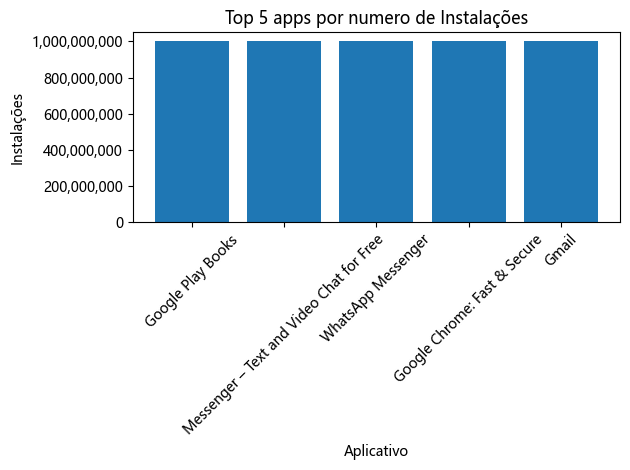

In [7]:
top5_apps =  df.nlargest(5, 'Installs')

plt.bar(top5_apps['App'], top5_apps['Installs'])

plt.xlabel('Aplicativo')
plt.ylabel('Instalações')
plt.xticks(rotation=45, fontsize=10)
plt.title('Top 5 apps por numero de Instalações')

plt.gca().yaxis.set_major_formatter(lambda x, _: '{:,.0f}'.format(x))

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------------------
## Verifico quais valores constam na coluna Category para garantir que não tenham nenhum erro

In [8]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## Cria um grafico de pizza que mostra as cateogiras do grafico e a frequencia delas
utilizo o count_label para para pegar as frequencias das categorias
utilizo o axis para garantir que o grafico sempre seja um circulo

[]

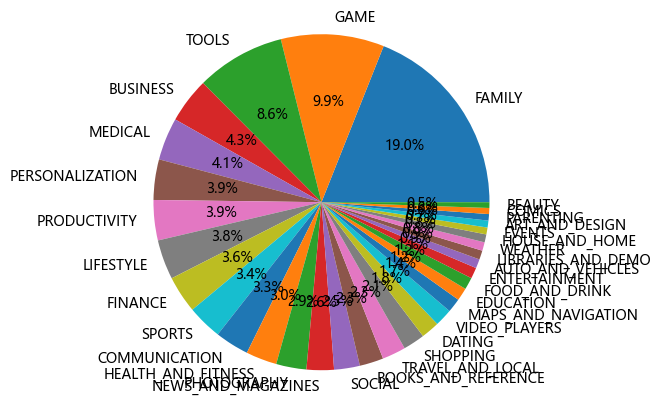

In [9]:
count_label = df['Category'].value_counts()

labels = count_label.index.tolist()
sizes = count_label.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.plot()

## Grafico de pizzas mas com uma categoria others
criei esse grafico pois acredito que facilita a leitura e analise

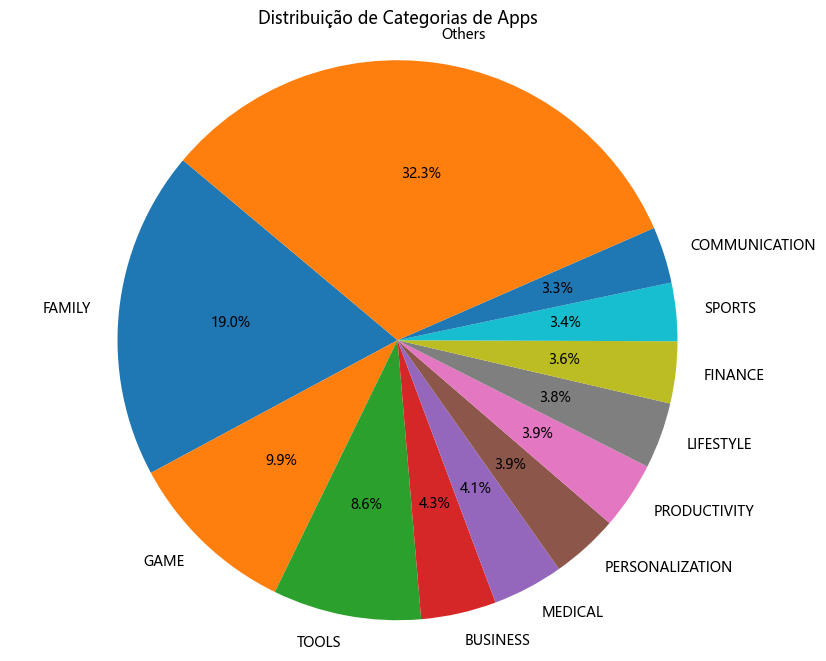

In [10]:
others = count_label[count_label / count_label.sum() < 0.03]

others_quantity = others.sum()

count_label = count_label[count_label / count_label.sum() >= 0.03]

count_label['Others'] = others_quantity


plt.figure(figsize=(10, 8))
plt.pie(count_label, labels=count_label.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribuição de Categorias de Apps')
plt.show()

# -----------------------------------------------------------------------------------------
## Verifico quais valores constam na coluna Price para garantir que não tenham nenhum erro

In [11]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

##  Função para converter a coluna price para que a função .max() possa ser aplicada corretamente
valor = espera que o valor seja um numero no seguinte formato: $4.99  
valor_tipo = string  
retorna a string passada como um Float

In [12]:
def converte_preco_para_inteiro(valor):
    return float(valor.replace('$',''))

df['Price'] = df['Price'].apply(converte_preco_para_inteiro)

##  Utilizo o .loc para encontrar o valor com maior preço na coluna
após localizar armazeno os dados na variavel app_mais_caro  
utilizo um print com um .to_string() para imprimir o App mais caro

In [13]:
app_mais_caro = df.loc[df['Price'] == df['Price'].max()]
print(app_mais_caro.to_string())

                           App   Category  Rating Reviews  Size  Installs  Type  Price Content Rating     Genres Last Updated Current Ver Android Ver
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6     275  7.3M     10000  Paid  400.0       Everyone  Lifestyle  May 3, 2018       1.0.1  4.1 and up


# -----------------------------------------------------------------------------------------
## Verifico quais valores constam na coluna Content Rating para garantir que não tenham nenhum erro

In [14]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

## Utilizo o value_counts para saber quantos valores de Mature 17+ aparecem no data frame

In [15]:
quantidade_mature = df['Content Rating'].value_counts()['Mature 17+']
print(f'A quantidade de apps classificados como mature 17+ é: {quantidade_mature}')

A quantidade de apps classificados como mature 17+ é: 393


# -----------------------------------------------------------------------------------------
## Verifico se a coluna Reviews esta com os valores corretos

In [16]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

## Transforma a coluna para tipo numerico
O motivo dessa coluna ser transformada de forma diferente das outras é porque ja é composta apenas de digitos e não precisa de remover caracters ou outras coisas

In [17]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

## Calculo o resultado dos 10 apps com mais reviews
utilizo o nlargest para pegar o apps e os ordeno
por fim uso o enumerate e zip com um for para que o output fique formatado

In [18]:
top_10_reviews = df.nlargest(10, 'Reviews')
top_10_reviews = top_10_reviews.sort_values(by='Reviews', ascending=False)
for i, (app, quantidade) in enumerate(zip(top_10_reviews['App'], top_10_reviews['Reviews'])):
    print(f'{i + 1} - {app}: {quantidade}')

1 - Facebook: 78158306
2 - WhatsApp Messenger: 69119316
3 - Instagram: 66577313
4 - Messenger – Text and Video Chat for Free: 56642847
5 - Clash of Clans: 44891723
6 - Clean Master- Space Cleaner & Antivirus: 42916526
7 - Subway Surfers: 27722264
8 - YouTube: 25655305
9 - Security Master - Antivirus, VPN, AppLock, Booster: 24900999
10 - Clash Royale: 23133508


# -----------------------------------------------------------------------------------------
## Verifico a coluna rating para ver se os valores estão corretos
## Vejo que ha valores NaN por isso os substituo pela media da coluna Rating


In [19]:
df['Rating'].unique()
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

## Calculo os 20 APPS com pior Rating

In [20]:
top_20_piores_apps = df.nsmallest(20, 'Rating')
top_20_piores_apps = top_20_piores_apps.sort_values(by='Rating', ascending=True)
for i, (app, rating) in enumerate(zip(top_20_piores_apps['App'], top_20_piores_apps['Rating'])):
    print(f'{i + 1} - {app}: {rating}')

1 - House party - live chat: 1.0
2 - Lottery Ticket Checker - Florida Results & Lotto: 1.0
3 - Familial Hypercholesterolaemia Handbook: 1.0
4 - FE Mechanical Engineering Prep: 1.0
5 - DT future1 cam: 1.0
6 - DS Creator 2.0: 1.0
7 - Tech CU Card Manager: 1.0
8 - CJ DVD Rentals: 1.0
9 - CR Magazine: 1.0
10 - CB Mobile Biz: 1.0
11 - MbH BM: 1.0
12 - BJ Bridge Standard American 2018: 1.0
13 - Truck Driving Test Class 3 BC: 1.0
14 - Clarksburg AH: 1.0
15 - Speech Therapy: F: 1.0
16 - Thistletown CI: 1.0
17 - EY TaxChat: 1.2
18 - Hercules CP Mobile: 1.4
19 - BD Provider App: 1.4
20 - Quiz DC: 1.4


# -----------------------------------------------------------------------------------------

## Transformo a Coluna Last Updated para formato de data, assim consigo pegar as menores data


In [21]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y')

aplicativos_mais_antigos = df.nsmallest(10, 'Last Updated')

for i, (App, date) in enumerate(zip(aplicativos_mais_antigos['App'], aplicativos_mais_antigos['Last Updated'])):
    print(f'{i + 1} - {App}: teve sua ultima atualização em: {date}')

1 - FML F*ck my life + widget: teve sua ultima atualização em: 2010-05-21 00:00:00
2 - CJ Poker Odds Calculator: teve sua ultima atualização em: 2011-01-30 00:00:00
3 - FD Shift Calendar Widget: teve sua ultima atualização em: 2011-03-16 00:00:00
4 - DEER HUNTER CHALLENGE: teve sua ultima atualização em: 2011-04-11 00:00:00
5 - Freecell CY: teve sua ultima atualização em: 2011-04-16 00:00:00
6 - Dx Ludo: teve sua ultima atualização em: 2011-04-18 00:00:00
7 - AH Alarm Panel: teve sua ultima atualização em: 2011-05-12 00:00:00
8 - CF-Bench Pro: teve sua ultima atualização em: 2011-06-23 00:00:00
9 - Wi-Fi Rabbit Unlock Key: teve sua ultima atualização em: 2011-06-26 00:00:00
10 - Apk Installer: teve sua ultima atualização em: 2011-06-29 00:00:00


# -----------------------------------------------------------------------------------------
## Grafico com os APPs que estão a mais tempo sem receber atualizações

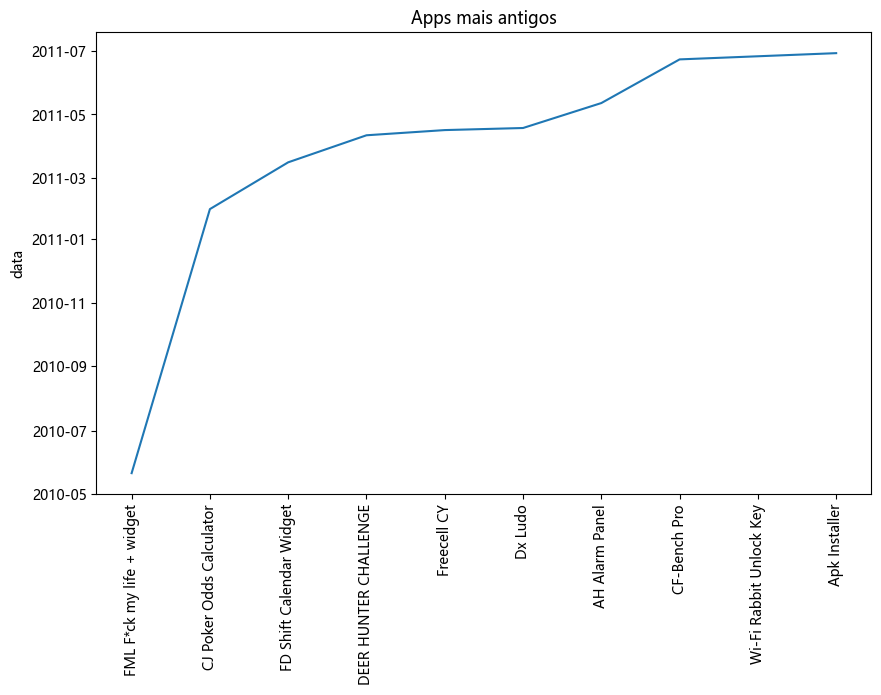

In [22]:
plt.figure(figsize=(10,6))

plt.plot(aplicativos_mais_antigos['App'], aplicativos_mais_antigos['Last Updated'])

plt.ylabel('data')
plt.title('Apps mais antigos')

#plt.gca().yaxis.set_major_formatter(lambda x, _: '{:,.0f}'.format(x))

plt.xticks(rotation=90)

plt.show()

# -----------------------------------------------------------------------------------------

## Cria grafico dos apps com as 20 piores avaliações

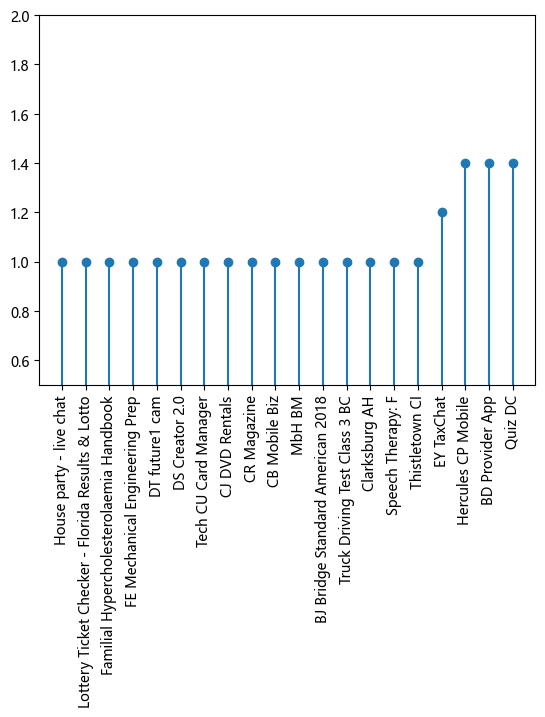

In [23]:
plt.stem(top_20_piores_apps['App'], top_20_piores_apps['Rating'])
plt.ylim(0.5, 2.0)
plt.xticks(rotation=90)

plt.show()